In [5]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Dataset_CFD'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [6]:
train_dir = "/content/drive/MyDrive/Dataset_CFD/train"
test_dir = "/content/drive/MyDrive/Dataset_CFD/test"

In [7]:
image_height = 128
image_width = 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading and preprocessing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 263 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [10]:
total_train_samples = train_generator.samples
total_test_samples = test_generator.samples

steps_per_epoch = total_train_samples // train_generator.batch_size
validation_steps = total_test_samples // test_generator.batch_size

In [8]:
#CNN sequential architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
#Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=validation_steps)

Epoch 1/10
8/8 [==============================] - 192s 24s/step - loss: 1.0959 - accuracy: 0.5238 - val_loss: 1.1852 - val_accuracy: 0.3906
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.4564 - accuracy: 0.7879 - val_loss: 1.2517 - val_accuracy: 0.4844
Epoch 3/10
8/8 [==============================] - 8s 945ms/step - loss: 0.3083 - accuracy: 0.8658 - val_loss: 2.1682 - val_accuracy: 0.3750
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.1884 - accuracy: 0.9437 - val_loss: 0.3852 - val_accuracy: 0.8125
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.0836 - accuracy: 0.9784 - val_loss: 0.5336 - val_accuracy: 0.8281
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.0617 - accuracy: 0.9784 - val_loss: 0.6943 - val_accuracy: 0.8438
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.0187 - accuracy: 0.9922 - val_loss: 0.7699 - val_accuracy: 0.8281
Epoch 8/10
8/8 [===============

In [14]:
test_loss, test_acc = model.evaluate(test_generator, steps=validation_steps)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

2/2 [==============================] - 1s 331ms/step - loss: 0.4907 - accuracy: 0.8750
Test accuracy: 0.875
Test loss: 0.4906797409057617


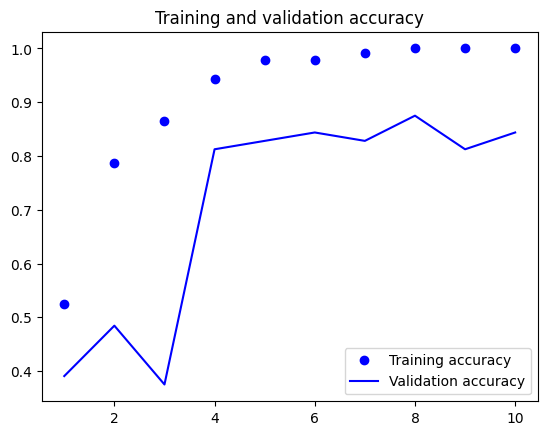

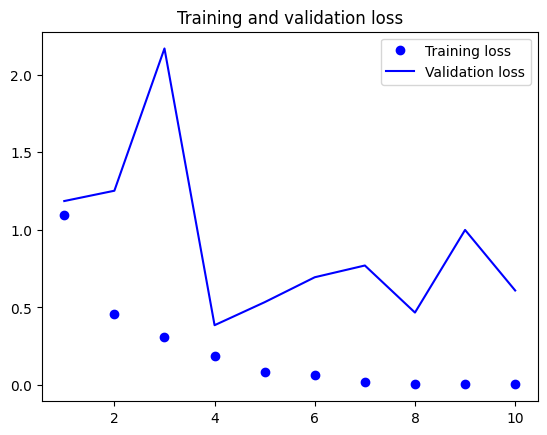

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()